## Question 2
### Can environmental factors help predict the frequency of fires in a given month?
First, we analyzed the fire frequency for each month and found that environmental factors do influence fire occurrence, with some factors playing a significant role. However, are environmental factors the only aspect we should consider?

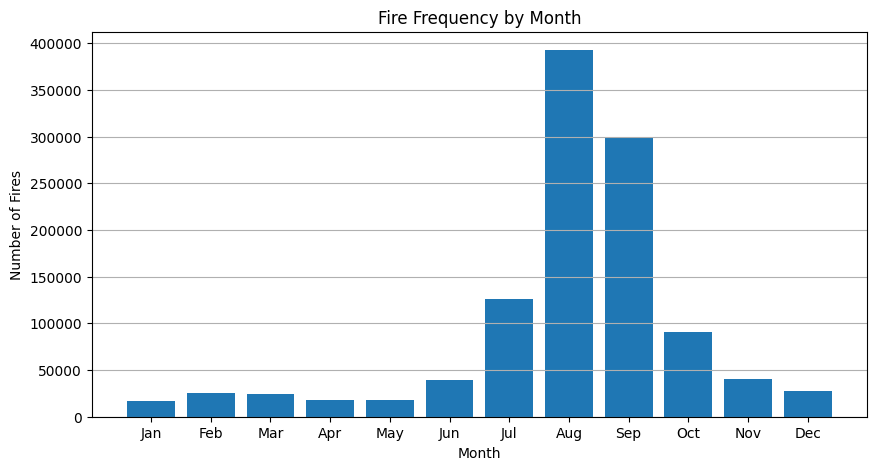

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./frequency/frequency_data/ca_daily_fire_2000_03252022.csv")

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

df['Year-Month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)  # Ensuring two-digit month format

fire_counts = df['Year-Month'].value_counts().sort_index()

fire_counts_df = fire_counts.reset_index()
fire_counts_df.columns = ['Year-Month', 'Fire Count']
fire_counts_df['Year-Month'] = pd.to_datetime(fire_counts_df['Year-Month'], format='%Y-%m')
fire_counts_df['Month'] = fire_counts_df['Year-Month'].dt.month

yearly_fire_counts = df['year'].value_counts().sort_index()

monthly_fire_counts = df['month'].value_counts().sort_index()

monthly_fire_counts
plt.figure(figsize=(10, 5))
plt.bar(monthly_fire_counts.index, monthly_fire_counts.values)
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.title("Fire Frequency by Month")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis='y')
plt.show()

In [2]:
env_df = pd.read_csv("./environmental/all_conditions.csv")
env_df.drop(columns=["Target"], inplace=True)

env_df['Date'] = pd.to_datetime(env_df['Date'], format='%m/%d/%Y')
env_df['Year-Month'] = env_df['Date'].dt.strftime('%Y-%m')
numeric_cols = env_df.select_dtypes(include=['number']).columns
env_monthly = env_df.groupby('Year-Month')[numeric_cols].mean().reset_index()


In [3]:
fire_counts_df['Year-Month'] = pd.to_datetime(fire_counts_df['Year-Month']).dt.strftime('%Y-%m')
merged_df = pd.merge(fire_counts_df, env_monthly, on='Year-Month', how='inner')


In [4]:
merged_df

,Year-Month,Fire Count,Month,Stn Id,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,2018-01,1697,1,153.011236,0.056242,0.075451,204.709694,9.269166,63.767808,41.157748,51.476378,87.881631,51.184740,71.797753,41.096969,3.479749,83.513274,52.214842
1,2018-02,2787,2,152.720303,0.102572,0.012345,343.988206,6.967762,65.493092,36.562791,50.270795,82.466723,31.127492,55.309744,33.680680,4.232716,101.578012,52.059927
2,2018-03,1307,3,155.168763,0.114007,0.104046,382.150681,9.254638,65.433438,41.998742,53.364675,88.059748,43.963836,66.334119,41.062474,4.455241,106.911792,54.735194
3,2018-04,1749,4,154.425779,0.181392,0.033323,537.929741,9.986503,73.096910,46.250053,59.437031,84.116218,37.701004,59.025621,43.450079,4.761859,114.277971,61.609350
4,2018-05,1266,5,154.614399,0.205004,0.009867,591.478350,11.737689,76.287138,51.231950,63.254445,84.107610,42.112990,61.074814,48.315373,5.061671,121.491981,66.250910
5,2018-06,2893,6,153.676067,0.256624,0.010712,697.071151,12.909211,84.862303,54.807607,69.671125,81.632342,34.852523,54.560155,50.755886,4.836999,116.096041,71.103364
6,2018-07,27995,7,152.942222,0.253699,0.034630,640.432157,15.979634,90.887895,62.036863,75.631712,80.325490,35.604183,54.926275,56.504837,4.593124,110.227425,75.450431
7,2018-08,53716,8,154.896684,0.225776,0.001577,583.834184,15.331888,88.738036,59.569337,73.252806,82.489031,35.917602,56.627551,55.184439,4.341097,104.189694,74.796378
8,2018-09,10302,9,155.129716,0.185649,0.001649,511.129716,13.150000,85.994005,54.498786,69.164264,82.294832,33.357106,55.580879,50.731783,3.971550,95.309354,70.991447
9,2018-10,3591,10,155.068898,0.129827,0.016536,383.767163,11.308722,78.699291,49.520767,62.931884,83.352065,34.307843,57.508185,46.197435,3.824701,91.794307,65.235573


We found out august is the month of highest frequency of fire. So we list it separately to analyze it. 

In [5]:
from scipy.stats import ttest_ind

august_data = merged_df[merged_df['Month'] == 8]
other_months_data = merged_df[merged_df['Month'] != 8]

for factor in ['Max Air Temp (F)', 'Min Rel Hum (%)', 'Min Air Temp (F)', 'Dew Point (F)']:
    t_stat, p_val = ttest_ind(august_data[factor], other_months_data[factor], equal_var=False)
    print(f"{factor}: t-stat = {t_stat:.2f}, p-value = {p_val:.3f}")


Max Air Temp (F): t-stat = 8.02, p-value = 0.000
Min Rel Hum (%): t-stat = -2.97, p-value = 0.006
Min Air Temp (F): t-stat = 8.75, p-value = 0.000
Dew Point (F): t-stat = 9.02, p-value = 0.000


T-stats measures the strength of a variable's impact. 
If p-value < 0.05, that factor is significantly different in August.
We can see here, all of them < 0.05 that means the factors are significantly different in August.

In [6]:
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

monthly_avg_conditions = merged_df.groupby('Month')[numeric_cols].mean().reset_index()

In [7]:
monthly_avg_conditions

,Month,Stn Id,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,1,156.412502,0.055953,0.073137,214.655481,9.112306,62.037988,39.855934,49.999158,90.340606,52.472413,73.747304,40.697494,3.686462,88.469559,50.752587
1,2,156.593294,0.093306,0.068295,327.087050,7.544998,63.170515,37.259571,49.496138,86.231296,38.585764,61.903409,35.709712,4.465737,107.175417,50.936237
2,3,157.895019,0.115007,0.089525,392.379614,9.390253,64.990606,42.129615,53.096687,89.585102,45.928674,68.047728,41.710418,4.445876,106.692166,54.737570
3,4,157.583975,0.176243,0.035682,530.066558,10.783363,73.077746,47.340707,59.874418,86.717352,41.439966,62.407101,45.564383,4.734419,113.623167,61.177584
4,5,157.859715,0.205464,0.029929,597.481309,11.906341,76.482697,50.949154,63.334872,85.844517,41.722473,61.655731,48.540548,4.988204,119.712380,66.246644
5,6,158.162917,0.250048,0.006319,678.224435,13.314487,84.536727,55.683689,69.861112,82.035282,36.291763,55.688795,51.430867,4.889498,117.348854,71.408214
6,7,156.753620,0.255141,0.012922,662.240806,14.967324,89.264097,59.663000,73.932973,80.989323,35.489373,54.989916,54.687830,4.572419,109.728846,74.630802
7,8,157.422823,0.226797,0.001970,585.844232,15.480765,89.529557,60.000882,73.958192,82.149214,36.002086,56.427315,55.529713,4.290588,102.972392,74.919945
8,9,157.271531,0.181233,0.003772,485.698663,13.559974,86.468549,55.653125,70.047114,81.856049,33.756873,55.638366,51.472458,3.966649,95.203260,71.554047
9,10,156.470262,0.137173,0.008981,402.807603,9.730011,78.726901,46.915587,61.721631,79.388286,28.812929,51.422947,41.628866,3.921529,94.111231,63.849175


We can use the most important factors (from random forest) that we analyzed previously for this plot.

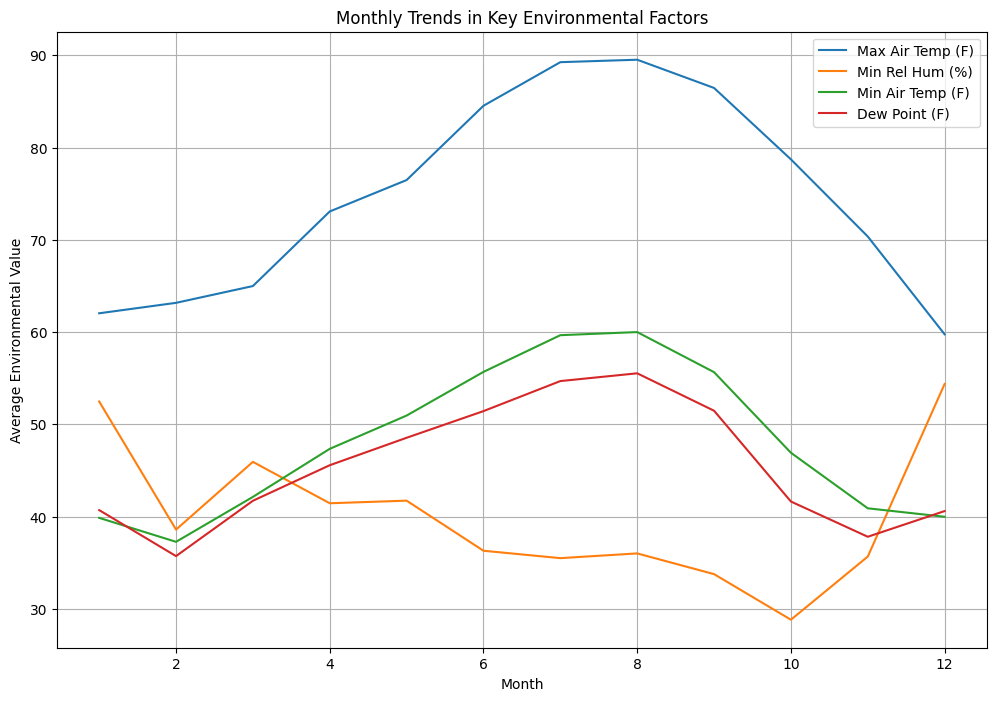

In [8]:
import seaborn as sns

plt.figure(figsize=(12, 8))
for factor in ['Max Air Temp (F)', 'Min Rel Hum (%)', 'Min Air Temp (F)', 'Dew Point (F)']:
    sns.lineplot(x=monthly_avg_conditions['Month'], y=monthly_avg_conditions[factor], label=factor)

plt.xlabel("Month")
plt.ylabel("Average Environmental Value")
plt.title("Monthly Trends in Key Environmental Factors")
plt.legend()
plt.grid()
plt.show()

After drawing this plot, the values of environmental factors dont have much difference in July and August. However, the previous plot shows a significant difference in the number of fires between July and August. 

We get the conclusion: environmental factors alone are not sufficient for predicting or analyzing fire frequency, as there is no strong correlation between them.